# `scipy.spatial` 

scipy.spatial can compute triangulations, Voronoi diagrams, and convex hulls of a set of points, by leveraging the `Qhull` library.

Moreover, it contains `KDTree` implementations for nearest-neighbor point queries, and utilities for distance computations in various metrics.

## Triangulations (qhull)

In [1]:
%matplotlib inline

import numpy as np
from scipy.spatial import Delaunay, ConvexHull, Voronoi
import matplotlib.pyplot as plt


points = np.random.rand(30, 2)   # 30 random points in 2-D

tri = Delaunay(points)
hull = ConvexHull(points)
voronoi = Voronoi(points)

In [2]:
print ("Neighbour triangles\n",tri.neighbors[0:5])
print ("Simplices\n", tri.simplices[0:5])
print ("Points\n", points[tri.simplices[0:5]])

Neighbour triangles
 [[ 1 13  8]
 [ 4  0 29]
 [ 6 12  3]
 [26 20  2]
 [14  1 25]]
Simplices
 [[28  0 20]
 [ 0 13 20]
 [16 11 15]
 [11 16 12]
 [13  2 20]]
Points
 [[[0.28485394 0.84110948]
  [0.27892461 0.5781609 ]
  [0.35560141 0.58310207]]

 [[0.27892461 0.5781609 ]
  [0.24536396 0.3412329 ]
  [0.35560141 0.58310207]]

 [[0.60713728 0.82055715]
  [0.89492509 0.80265779]
  [0.47928688 0.92351043]]

 [[0.89492509 0.80265779]
  [0.60713728 0.82055715]
  [0.7334313  0.71701037]]

 [[0.24536396 0.3412329 ]
  [0.51589932 0.49701288]
  [0.35560141 0.58310207]]]


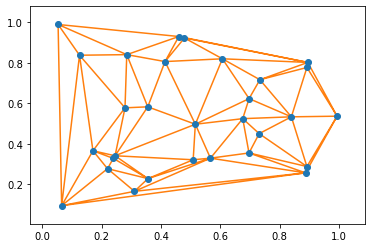

In [3]:
from scipy.spatial import delaunay_plot_2d
delaunay_plot_2d(tri)
pass

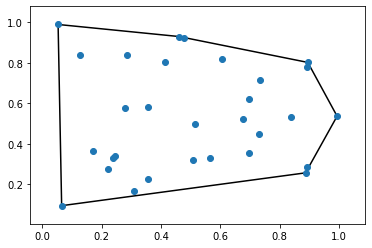

In [4]:
from scipy.spatial import convex_hull_plot_2d

convex_hull_plot_2d(hull)
pass

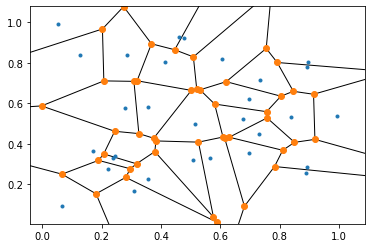

In [5]:
from scipy.spatial import voronoi_plot_2d

voronoi_plot_2d(voronoi)
pass

## KDtree

Allows very fast point to point searches.

In [6]:
from scipy.spatial import KDTree, cKDTree

In [7]:
tree = cKDTree(points)

print (tree.data)

[[0.27892461 0.5781609 ]
 [0.69701637 0.62369124]
 [0.51589932 0.49701288]
 [0.23961042 0.32821642]
 [0.06542972 0.09445233]
 [0.17093148 0.36590518]
 [0.31078809 0.16535164]
 [0.88720269 0.25672062]
 [0.56686433 0.32933823]
 [0.73102964 0.45064826]
 [0.993601   0.53684406]
 [0.89492509 0.80265779]
 [0.7334313  0.71701037]
 [0.24536396 0.3412329 ]
 [0.67564778 0.52463206]
 [0.47928688 0.92351043]
 [0.60713728 0.82055715]
 [0.41379392 0.80685966]
 [0.35619501 0.22824664]
 [0.12565144 0.8381865 ]
 [0.35560141 0.58310207]
 [0.89193453 0.77762256]
 [0.69673601 0.35501451]
 [0.50866625 0.32139632]
 [0.46034912 0.93070637]
 [0.21996432 0.27746788]
 [0.05347653 0.99018704]
 [0.89180088 0.28804185]
 [0.28485394 0.84110948]
 [0.83947144 0.53369397]]


In [8]:
%%timeit

tree.query((0.5,0.5))

27.8 µs ± 80.9 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
test_points = np.random.rand(1000, 2)   # 1000 random points in 2-D

In [10]:
%%timeit

tree.query(test_points) 

543 µs ± 431 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
more_points = np.random.rand(10000, 2)   # 1000 random points in 2-D

big_tree = KDTree(more_points)

In [12]:
%%timeit

KDTree(more_points)

4.18 ms ± 5.36 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit

big_tree.query(test_points) 

937 µs ± 4.69 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Compare this to the brute-force version


At what point does it make sense to use kdTree and not brute-force distance tests ?

The brute force method takes a fixed time per sample point and a fixed cost associated with the N-neighbour distance computation (but this can be vectorised efficiently).

In [14]:
# Brute force version

def brute_force_distance(pts, spt):

    d = pts - spt
    d2 = d**2
    distances2 = np.einsum('ij->i',d2)
    
    nearest = np.argsort(distances2)[0]
    
    return np.sqrt(distances2[nearest]), nearest

# print np.einsum('ij->i',distances2)

In [15]:
print (brute_force_distance(more_points, (0.0,0.0)))
print (big_tree.query((0.0,0.0)))

(0.008606085689759473, 4910)
(0.008606085689759473, 4910)


In [16]:
%%timeit

brute_force_distance(points, (0.5,0.5))
brute_force_distance(points, (0.0,0.0))
brute_force_distance(points, (0.25,0.25))

36.9 µs ± 115 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%%timeit

tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

31.1 µs ± 92 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%%timeit

brute_force_distance(more_points, (0.5,0.5))
# brute_force_distance(more_points, (0.0,0.0))
# brute_force_distance(more_points, (0.25,0.25))

977 µs ± 506 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%%timeit

big_tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

34.6 µs ± 59.2 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
